<h1>TASK 2-  
    To Explore Supervised Machine Learning </h1>

<h5> Importing required libraries</h5>

In [35]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

<h5> Importing data</h5>

In [36]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(20)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [38]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h6> There is no null value. </h6>

In [39]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h4> Graphical representastion of dataset. </h4>

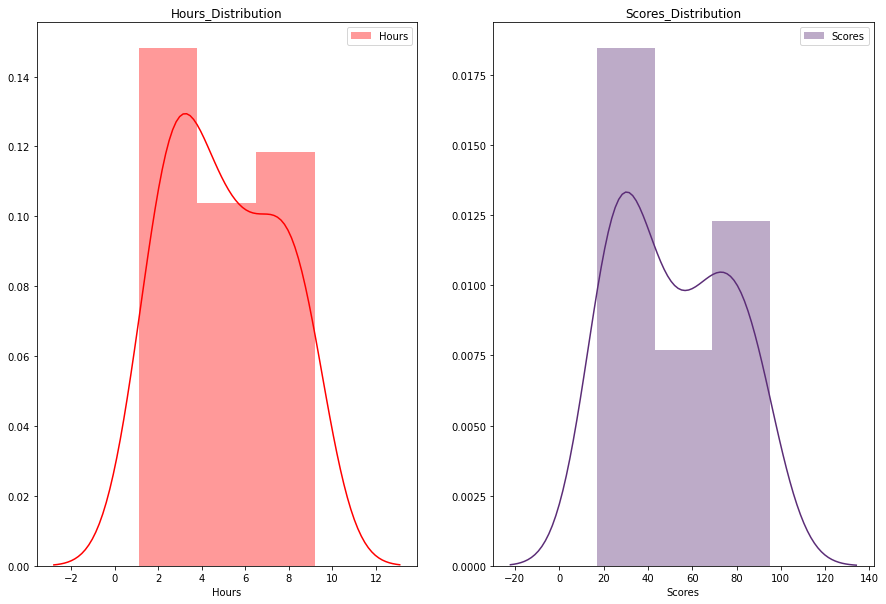

In [40]:
graph= plt.figure(figsize=(15,10))
x=plt.subplot(1,2,1)
plt.title('Hours_Distribution')
p1=sns.distplot(data['Hours'],label='Hours',color='r',ax=x)
y=plt.subplot(1,2,2)
plt.title('Scores_Distribution')
p2=sns.distplot(data['Scores'],label='Scores',color='#5B2D77',ax=y)
p1.legend()
p2.legend()



<h5>Correlation<h/5>

<AxesSubplot:>

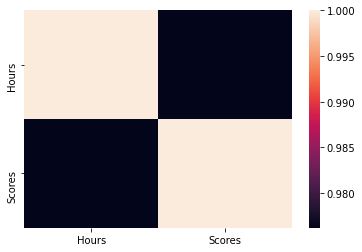

In [43]:
sns.heatmap(data.corr())

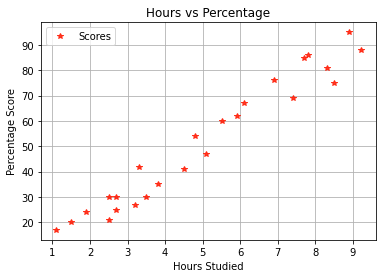

In [44]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*',color='#FF210B',alpha=0.9)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid(True)
plt.show()

<h5> Preparing the data</h5>

In [45]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [46]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [47]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


<h5> Plotting the regression line</h5>

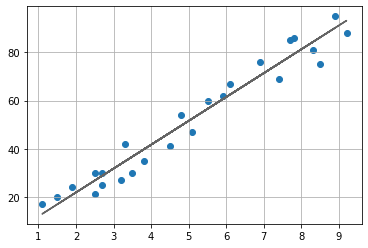

In [48]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='#646464');
plt.grid(True)
plt.show()

<h4> Making Predictions.</h4>

In [49]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [50]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [51]:
data.shape

(25, 2)

In [52]:
# You can also test with your own data
hours = 9.25
hours = np.array([[hours],])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


<h5> Evaluating the model</h5>

In [54]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
